In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
data_2015 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Popularity%20of%20Cambridge%20University%20Colleges/Cam_stats_2015.csv')
data_2016 = pd.read_csv('https://github.com/benvictoria17/DataAnalytics/raw/master/dataset/Popularity%20of%20Cambridge%20University%20Colleges/Cam_stats_2016.csv')
data_2017 = pd.read_csv('https://github.com/benvictoria17/DataAnalytics/raw/master/dataset/Popularity%20of%20Cambridge%20University%20Colleges/Cam_stats_2017.csv')
data_2018 = pd.read_csv('https://github.com/benvictoria17/DataAnalytics/raw/master/dataset/Popularity%20of%20Cambridge%20University%20Colleges/Cam_stats_2018.csv')
data_2019 = pd.read_csv('https://github.com/benvictoria17/DataAnalytics/raw/master/dataset/Popularity%20of%20Cambridge%20University%20Colleges/Cam_stats_2019.csv')

In [3]:
print(data_2015.shape)
print(data_2016.shape)
print(data_2017.shape)
print(data_2018.shape)
print(data_2019.shape)

(32, 7)
(32, 7)
(32, 7)
(32, 7)
(32, 7)


In [4]:
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

In [5]:
data = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019])

data.reset_index(drop=True, inplace=True)

print(data.shape)

(160, 8)


In [6]:
data.describe()

,1st choice,2nd choice,No of applicants admitted to their 1st choice,No of applicants admitted to their 2nd choice,Year
count,160.000000,160.000000,155.000000,155.000000,160.000000
mean,694.168750,694.156250,72.858065,18.658065,2017.000000
std,1412.475619,1693.056811,49.763002,13.563434,1.418654
min,29.000000,40.000000,4.000000,1.000000,2015.000000
25%,236.500000,221.750000,43.500000,9.500000,2016.000000
50%,365.500000,342.000000,63.000000,16.000000,2017.000000
75%,520.750000,542.250000,91.500000,23.500000,2018.000000
max,9935.000000,12179.000000,313.000000,64.000000,2019.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Code                                           155 non-null    object 
 1   College                                        160 non-null    object 
 2   1st choice                                     160 non-null    int64  
 3   2nd choice                                     160 non-null    int64  
 4   No of applicants admitted to their 1st choice  155 non-null    float64
 5   No of applicants admitted to their 2nd choice  155 non-null    float64
 6   Total admitted                                 156 non-null    object 
 7   Year                                           160 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 10.1+ KB


In [8]:
data["College"].value_counts()

Gonville and Caius College    5
Corpus Christi College        5
Wolfson College               5
Trinity Hall                  5
Trinity College               5
Sidney Sussex College         5
Selwyn College                5
Robinson College              5
Queens' College               5
Peterhouse                    5
Pembroke College              5
Murray Edwards College        5
Newnham College               5
Magdalene College             5
Lucy Cavendish College        5
King's College                5
St John's College             5
Jesus College                 5
Homerton College              5
Hughes Hall                   5
Girton College                5
Fitzwilliam College           5
Emmanuel College              5
St Edmund's College           5
Downing College               5
Darwin College                5
St Catharine's College        5
Clare Hall                    5
Clare College                 5
Churchill College             5
Christ's College              5
No prefe

In [9]:
data.isnull().sum()

Code                                             5
College                                          0
1st choice                                       0
2nd choice                                       0
No of applicants admitted to their 1st choice    5
No of applicants admitted to their 2nd choice    5
Total admitted                                   4
Year                                             0
dtype: int64

In [10]:
data.loc[data['Code'].isnull()]

,Code,College,1st choice,2nd choice,No of applicants admitted to their 1st choice,No of applicants admitted to their 2nd choice,Total admitted,Year
31,NaN,No preference,4747,6657,NaN,NaN,NaN,2015
63,NaN,No preference,4375,5991,NaN,NaN,NaN,2016
95,NaN,No preference,9260,11194,NaN,NaN,NaN,2017
127,NaN,No preference,9763,11894,NaN,NaN,nul,2018
159,NaN,No preference,9935,12179,NaN,NaN,NaN,2019


In [11]:
data.fillna(value=0, inplace=True)

In [12]:
data['Total admitted'].replace(to_replace='nul', value=0, inplace=True)

In [13]:
data['Total admitted'] = pd.to_numeric(data['Total admitted'])

data['No of applicants admitted to their 1st choice'] = data['No of applicants admitted to their 1st choice'].astype('int64')
data['No of applicants admitted to their 2nd choice'] = data['No of applicants admitted to their 2nd choice'].astype('int64')
data['Total admitted'] = data['Total admitted'].astype('int64')

data['Year'] = data['Year'].astype('str')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Code                                           160 non-null    object
 1   College                                        160 non-null    object
 2   1st choice                                     160 non-null    int64 
 3   2nd choice                                     160 non-null    int64 
 4   No of applicants admitted to their 1st choice  160 non-null    int64 
 5   No of applicants admitted to their 2nd choice  160 non-null    int64 
 6   Total admitted                                 160 non-null    int64 
 7   Year                                           160 non-null    object
dtypes: int64(5), object(3)
memory usage: 10.1+ KB


In [15]:
print('Total number of applicants: {}'.format(data['1st choice'].sum()))
print('Total number of applicants admitted: {}'.format(data['Total admitted'].sum()))
print('Percentage of applicants admitted: {}%'.format((data['Total admitted'].sum()/data['1st choice'].sum()*100).round(1)))

Total number of applicants: 111067
Total number of applicants admitted: 23738
Percentage of applicants admitted: 21.4%


In [16]:
yearly_trend = data.groupby('Year')[['1st choice','Total admitted']].sum().reset_index()

yearly_trend.rename(columns={'1st choice': 'Applicants', 'Total admitted': 'Applicants Admitted'}, inplace=True)

yearly_trend

,Year,Applicants,Applicants Admitted
0,2015,18519,4436
1,2016,18681,4437
2,2017,23900,4776
3,2018,25113,5073
4,2019,24854,5016


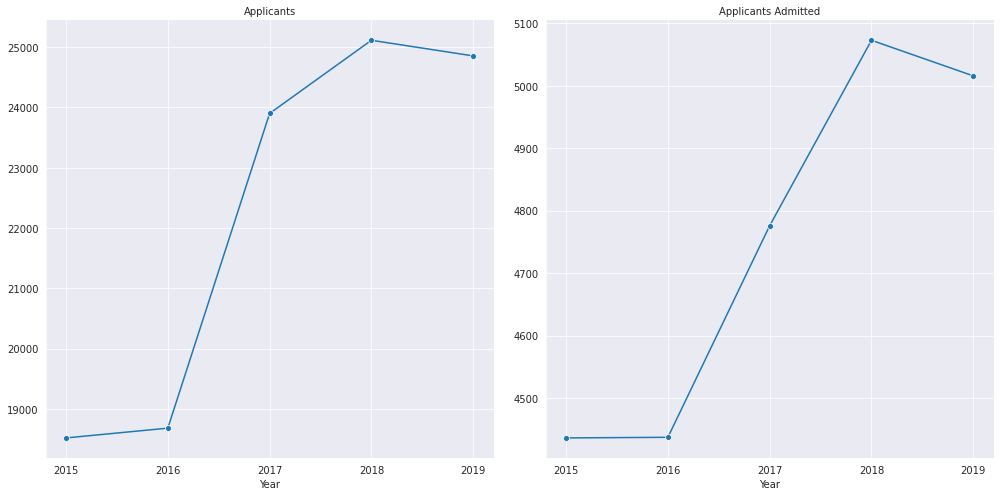

In [17]:
yearly_trend_melted = pd.melt(yearly_trend, id_vars=['Year'], value_vars=['Applicants','Applicants Admitted'])

g = sns.relplot(data=yearly_trend_melted, x="Year", y="value", col="variable", kind="line", marker='o', facet_kws={'sharey' : False}, height=7, aspect=1)

g.set_axis_labels('Year', '')

g.set_titles('{col_name}')

g.tight_layout(w_pad=2)

In [18]:
applicant_pivot = pd.pivot_table(data, values='1st choice', index=['College'], columns=['Year'], aggfunc=np.sum, margins=True, margins_name='Total')

applicant_pivot.sort_values(by='Total', ascending=False, inplace=True)

applicant_pivot.drop(['No preference','Total'], inplace=True)

applicant_pivot.loc['Total'] = [applicant_pivot['2015'].sum(), applicant_pivot['2016'].sum(), applicant_pivot['2017'].sum(), applicant_pivot['2018'].sum(), applicant_pivot['2019'].sum(), applicant_pivot['Total'].sum()]

applicant_pivot

Year,2015,2016,2017,2018,2019,Total
College,,,,,,
Trinity College,2522,2423,2764,3194,2702,13605
King's College,1230,1378,1616,1304,1524,7052
St John's College,927,934,1200,1027,974,5062
Churchill College,626,817,585,652,745,3425
Darwin College,656,711,578,625,589,3159
Jesus College,477,469,461,647,703,2757
Queens' College,512,550,612,485,459,2618
Christ's College,674,480,446,442,518,2560
Pembroke College,505,544,471,453,405,2378


In [19]:
admitted_pivot = pd.pivot_table(data, values='Total admitted', index=['College'], columns=['Year'], aggfunc=np.sum, margins=True, margins_name='Total')

admitted_pivot.sort_values(by='Total', ascending=False, inplace=True)

admitted_pivot.drop(['No preference','Total'], inplace=True)

admitted_pivot.loc['Total'] = [admitted_pivot['2015'].sum(), admitted_pivot['2016'].sum(), admitted_pivot['2017'].sum(), admitted_pivot['2018'].sum(), admitted_pivot['2019'].sum(), admitted_pivot['Total'].sum()]

admitted_pivot

Year,2015,2016,2017,2018,2019,Total
College,,,,,,
Homerton College,429,383,405,456,389,2062
Hughes Hall,312,347,421,453,421,1954
Wolfson College,383,305,357,385,417,1847
Darwin College,293,303,308,297,324,1525
St Edmund's College,185,235,239,273,258,1190
Queens' College,215,220,217,189,245,1086
Fitzwilliam College,186,228,174,213,148,949
Jesus College,161,132,175,192,172,832
Downing College,116,134,155,173,182,760


In [20]:
data['Preference'] = np.where(data['College']=='No preference','Without Preference','With Preference')
preference_pivot = pd.pivot_table(data, values='1st choice', index=['Preference'], columns=['Year'], aggfunc=np.sum, margins=True, margins_name='Total')

preference_pivot.drop(columns=['Total'], inplace=True)

preference_pivot

Year,2015,2016,2017,2018,2019
Preference,,,,,
With Preference,13772,14306,14640,15350,14919
Without Preference,4747,4375,9260,9763,9935
Total,18519,18681,23900,25113,24854


In [21]:
preference_pivot_percent = preference_pivot.loc[['With Preference','Without Preference'], :]

preference_pivot_percent['2015'] = (preference_pivot_percent['2015'] / preference_pivot_percent['2015'].sum() * 100).round(1)
preference_pivot_percent['2016'] = (preference_pivot_percent['2016'] / preference_pivot_percent['2016'].sum() * 100).round(1)
preference_pivot_percent['2017'] = (preference_pivot_percent['2017'] / preference_pivot_percent['2017'].sum() * 100).round(1)
preference_pivot_percent['2018'] = (preference_pivot_percent['2018'] / preference_pivot_percent['2018'].sum() * 100).round(1)
preference_pivot_percent['2019'] = (preference_pivot_percent['2019'] / preference_pivot_percent['2019'].sum() * 100).round(1)

preference_pivot_percent

Year,2015,2016,2017,2018,2019
Preference,,,,,
With Preference,74.4,76.6,61.3,61.1,60.0
Without Preference,25.6,23.4,38.7,38.9,40.0


In [22]:
preference_pivot_percent_t = preference_pivot_percent.transpose()

preference_pivot_percent_t['Total'] = preference_pivot_percent_t['With Preference'] + preference_pivot_percent_t['Without Preference']

preference_pivot_percent_t

Preference,With Preference,Without Preference,Total
Year,,,
2015,74.4,25.6,100.0
2016,76.6,23.4,100.0
2017,61.3,38.7,100.0
2018,61.1,38.9,100.0
2019,60.0,40.0,100.0


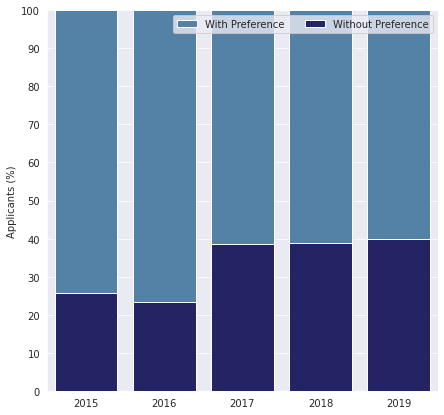

In [23]:
f, ax = plt.subplots(figsize=(7, 7))

sns.barplot(x=preference_pivot_percent.T.index, y="Total", data=preference_pivot_percent_t, label="With Preference", color='steelblue')

sns.barplot(x=preference_pivot_percent.T.index, y="Without Preference", data=preference_pivot_percent_t, label="Without Preference", color='midnightblue')

ax.set_yticks(np.arange(0, 101, step=10))

ax.set_ylim(top=100)

ax.set(ylabel="Applicants (%)", xlabel="")

ax.legend(ncol=2, loc="upper right", frameon=True)

plt.show()

In [24]:
college_applicants = data.loc[data['College']!='No preference'].groupby('College').agg({'1st choice': 'sum'}).sort_values(by='1st choice', ascending=False).reset_index()

college_applicants['Applicants_pct'] = college_applicants[['1st choice']].apply(lambda x:x*100 / float(x.sum())).applymap('{:.1f}%'.format)

college_applicants.rename(columns={'1st choice': 'Applicants'}, inplace=True)

college_applicants.head()

,College,Applicants,Applicants_pct
0,Trinity College,13605,18.6%
1,King's College,7052,9.7%
2,St John's College,5062,6.9%
3,Churchill College,3425,4.7%
4,Darwin College,3159,4.3%


In [25]:
college_applicants = data.loc[data['College']!='No preference'].groupby('College').agg({'1st choice': 'sum'}).sort_values(by='1st choice', ascending=False).reset_index()

college_applicants['Applicants_pct'] = college_applicants[['1st choice']].apply(lambda x:x*100 / float(x.sum())).applymap('{:.1f}%'.format)

college_applicants.rename(columns={'1st choice': 'Applicants'}, inplace=True)

college_applicants.head()

,College,Applicants,Applicants_pct
0,Trinity College,13605,18.6%
1,King's College,7052,9.7%
2,St John's College,5062,6.9%
3,Churchill College,3425,4.7%
4,Darwin College,3159,4.3%


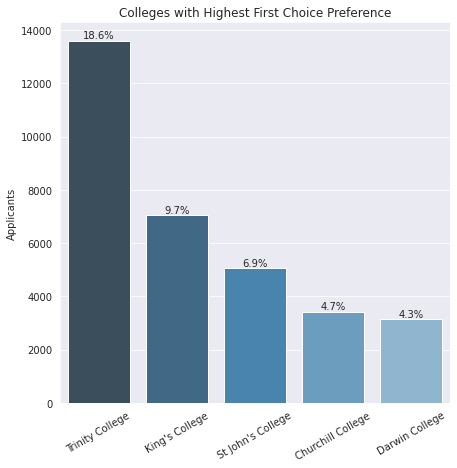

In [26]:
f, ax = plt.subplots(figsize=(7, 7))

ax = sns.barplot(x="College", y="Applicants", data=college_applicants.head(), palette="Blues_r_d")

ax.set_xticklabels(labels=college_applicants['College'].head(), rotation=30)

ax.set(ylabel="Applicants", xlabel="")

ax.set_title('Colleges with Highest First Choice Preference')

ax.bar_label(ax.containers[0], labels=college_applicants['Applicants_pct'].head())

plt.show()

In [27]:
college_applicants.tail()

,College,Applicants,Applicants_pct
26,Lucy Cavendish College,644,0.9%
27,Robinson College,551,0.8%
28,Girton College,519,0.7%
29,Sidney Sussex College,490,0.7%
30,Murray Edwards College,183,0.3%


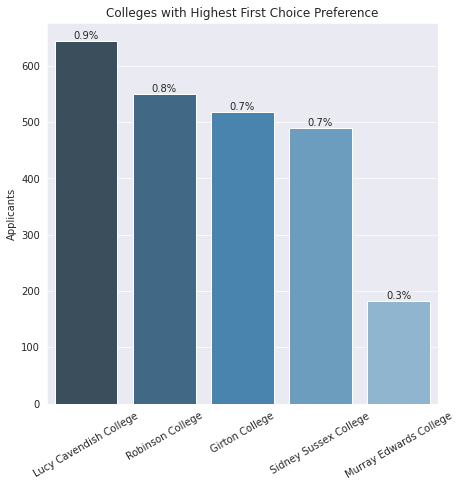

In [28]:
f, ax = plt.subplots(figsize=(7, 7))

ax = sns.barplot(x="College", y="Applicants", data=college_applicants.tail(), palette="Blues_r_d")

ax.set_xticklabels(labels=college_applicants['College'].tail(), rotation=30)

ax.set(ylabel="Applicants", xlabel="")

ax.set_title('Colleges with Highest First Choice Preference')

ax.bar_label(ax.containers[0], labels=college_applicants['Applicants_pct'].tail())

plt.show()

In [29]:
data['No of applicants admitted from NP'] = data['Total admitted'] - data['No of applicants admitted to their 1st choice'] - data['No of applicants admitted to their 2nd choice']
np_admitted_pivot = pd.pivot_table(data, values='No of applicants admitted from NP', index=['College'], columns=['Year'], aggfunc=np.sum, margins=True, margins_name='Total')

np_admitted_pivot.drop(['No preference', 'Total'], inplace=True)

np_admitted_pivot.sort_values(by='Total', ascending=False, inplace=True)

np_admitted_pivot

Year,2015,2016,2017,2018,2019,Total
College,,,,,,
Hughes Hall,210,221,323,341,309,1404
Wolfson College,166,159,265,277,282,1149
St Edmund's College,131,155,205,224,165,880
Darwin College,94,84,142,132,128,580
Lucy Cavendish College,91,71,124,121,155,562
Homerton College,73,72,105,128,91,469
Fitzwilliam College,66,102,73,98,91,430
Girton College,76,69,76,76,120,417
Murray Edwards College,65,62,70,84,70,351
